- This Notebook is based on the analysis-Notebooks of the spell checkers. Because only the most important stats are needed to this point, this is an adjusted version of the analysis-Notebooks to better compare the rerankings.

# Analysis: Reranking the suggestion lists of Boyd spell checker, performed on whole texts; All candidates

This notebook is going to analyse the reranking of the suggestion lists given by a spell checker, Boyd this case. 

Therefore, the reranked suggestion lists need to be evalauted. The respective dataframe is loaded (see section 1) into this notebook and afterwards, the evaluation results are going to be explored (see section 2-4).

- <span style='background:yellow'> **Note: Since errors have been analyzed within a full text, these are only analysed on token level. No types are to be reconstructed!** </span>

## Outline
0. Preparation
    - Imports
    - Configuration
1. Load data sets
    - Types & token, case insensitive & case sensitive
    - Explanantion of (new) variables
2. [Types & Tokens Stats](#2)
    - Upper bound value
    - Bar charts
    - Ratio
3. [Distribution (token base):](#3)

    - [Per language_tool suggestions](#5)
    
4. [Relationships:](#4) 

    - Suggestions index on test point
        - Percent stacked bar plot
        - [Percent stacked bar plot, 3 categories](#6)
    - Suggestions index on Levenshtein distance
        - [Percent stacked bar plot](#7)
        [hallo](#100)

<a id='0'></a><br>
## 0 - Preparation

In [1]:
# TODO: Change summarys of plot to language_tool data
# IMPORTS
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import numpy as np
# Sets backend to the 'inline' backend; Helps with plotting
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

import sys
#sys.path.insert(0, './Lisa/Experiment_hunspell')
sys.path.insert(0, '../Experiment_hunspell')

import helpers_hunspell_analysis as helpers

In [2]:
# Configuration for plots
# Set figure size for sns plot
%config InlineBackend.figure_format = 'retina'
mpl.rc('figure', figsize=(8, 6), dpi=100)
sns.set()
#sns.set_style('darkgrid')

# Do not truncate rows of DataFrame
pd.set_option('display.max_rows', None)
# Do not truncate column width
pd.set_option('display.max_colwidth', None)

<a id='1'></a> <br>
## 1 - Load data sets
Four versions of the data set are reloaded from pickles. The evaluation has been already run in _postprocessing_run_complete_default_config_ notebook.
- type and token based case insensitive (no special ending in df name, i. e. _default_)
- type and token based case sensitive (_cs ending_ in df name) 


### Explanation of (new) variables
- Whether the target word is among the suggested words by Language Tool (= _**'in_sugg'**_).
    - At which index it is among the suggested words by Language Tool (= _**'sugg_index'**_).
- Whether the target word is ranked at index 0 by Language Tool (= _**'idx0'**_).

In [3]:
# Load df from pickle
data_error_token = pd.read_pickle('./pickles/reranking_data_error_token_boyd_evaluation_lc_NEW.pkl')

In [4]:
data_error_token_cs = pd.read_pickle('./pickles/reranking_data_error_token_boyd_evaluation_cs_NEW.pkl')

In [5]:
#display(data_error_token_cs.tail(100))

In [6]:
#display(data_error_types.head(5))

<a id='2'></a><br>
## 2 - Types & Tokens Stats

### Get upper bound information

In [7]:
# Values copied from language_tool_upper_bound notebook
# TODO: Do not hardcode
#ub_types = 0.0
ub_token = 0.0

#  TODO: Change values
#ub_types_ci = 0.0
ub_token_ci = 0.0

#df_list = [data_error_types, data_error_token]
df_list = [data_error_token]

def get_ub(df, ub):
    ub_pct = round(ub*100, 2)
    ub_ttl = int(df.shape[0]*ub)
    return [ub, ub_pct, ub_ttl]

#ub_types_list = get_ub(data_error_types, ub_types)
ub_token_list = get_ub(data_error_token, ub_token)

#ub_types_ci_list = get_ub(data_error_types, ub_types_ci)
ub_token_ci_list = get_ub(data_error_token, ub_token_ci)

#for i in range(len(ub_types_list)):
#    print(ub_types_list[i])
#print('*'*20)
#for i in range(len(ub_token_list)):
#    print(ub_token_list[i])

### Get values for bar chart

In [8]:
# Get values for y axis
def get_values_bars(df):
    total = df.shape[0]
    in_sugg = df[df.in_sugg].shape[0]
    idx0 = df[df.idx0].shape[0]
    return [total, in_sugg, idx0]

#values_types = get_values_bars(data_error_types)
values_token = get_values_bars(data_error_token)

#values_types_cs = get_values_bars(data_error_types_cs)
values_token_cs = get_values_bars(data_error_token_cs) 

#print('Types case insensitive')
#for i in range(len(values_types)):
#    print(values_types[i])
#print('*'*20)

print('Token case insensitive')
for i in range(len(values_token)):
    print(values_token[i])
print('*'*20)

#print('Types CASE SENSITIVE')
#for i in range(len(values_types_cs)):
#    print(values_types_cs[i])
#print('*'*20)

print('Token CASE SENSITIVE')
for i in range(len(values_token_cs)):
    print(values_token_cs[i])

Token case insensitive
24601
22636
12748
********************
Token CASE SENSITIVE
24601
22448
11835


In [9]:
# Put everything together in lists
# define x axis POSITIONS
#x_pos = [[0,1,2], [0,1,2], [0,1,2], [0,1,2]] #plot 0, plot 1, plot 3, plot 4
x_pos = [[0,1,2], [0,1,2]]

# put y axis VALUES together, see above
#y_val = [values_types, values_token, values_types_cs, values_token_cs] #plot 0, plot 1, plot 3, plot 4
y_val = [values_token, values_token_cs]

# put upper bound values together, see above
#ub_list = [ub_types_ci_list, ub_token_ci_list, ub_types_list, ub_token_list]
ub_list = [ub_token_ci_list, ub_token_list]

x_y_plots = zip(x_pos, y_val)

### Bar charts

In [10]:
# TODO: Outsource

def loop_plot(plots, ub_list):
    
        # Plot everythin in one figure
        fig = plt.figure(figsize=(8,8))
        
        # Use dict to have more control
        axs = {}
        # Counter for position of subplot, third argument
        e = 1
        
        # loop over 'plots', i. e. 1 list containing 4 tuples (idx 0,1,2,3);
        # each tuple containing 2 lists (x and y values)
        
        # control overall plot via 'idx', set axes
            # idx is no. of plot
        # control content of plot via 'value'
        
        for idx, value in enumerate(plots):
        #for idx, (x, y) in enumerate(zip(x_pos, y_vals)):
            
            # Add axes subplot
            axs[idx] = fig.add_subplot(2,2,e)
       
            # Create bars
            # value[0] is position x axis, value[1] position y axis (value count)
            axs[idx].bar(value[0], value[1])

            
            # CONFIQ that stays same
            
            # Names of groups and bar width
            names = ['all errors','in suggestions','first suggestion']
            barWidth = 1

            # Custom x axis
            axs[idx].set_xticks(value[0])
            axs[idx].set_xticklabels(names, rotation=20)
            axs[idx].set_ylabel('count')

            # Baseline plot
            # Use idx of loop to control ub_list also
            axs[idx].axhline(ub_list[idx][2], ls='-', color='r') # access total value
            axs[idx].text(2, ub_list[idx][2]+(value[1][0]/50), str(ub_list[idx][1])+'%', color='r', weight='bold', style='italic') # x,y ; Access pct value
            axs[idx].text(2, ub_list[idx][2]-(value[1][0]/12.5), '('+str(ub_list[idx][2])+')')
            
            # Text for bar plots (total, pct)
            pct_bars = [100, round(value[1][1]/value[1][0]*100,2), round(value[1][2]/value[1][0]*100,2)] # all, in sugg, index 0
            for idx2, value2 in enumerate(value[1]): # loop over y positions
                # total
                axs[idx].text(idx2-0.275, value2-(value[1][0]*0.1), '('+str(value2)+')') # x, y
                # percent
                axs[idx].text(idx2-0.275, value2, str(pct_bars[idx2])+'%', color='grey', weight='bold', style='italic')
            
            e+=1
        
        return fig, axs

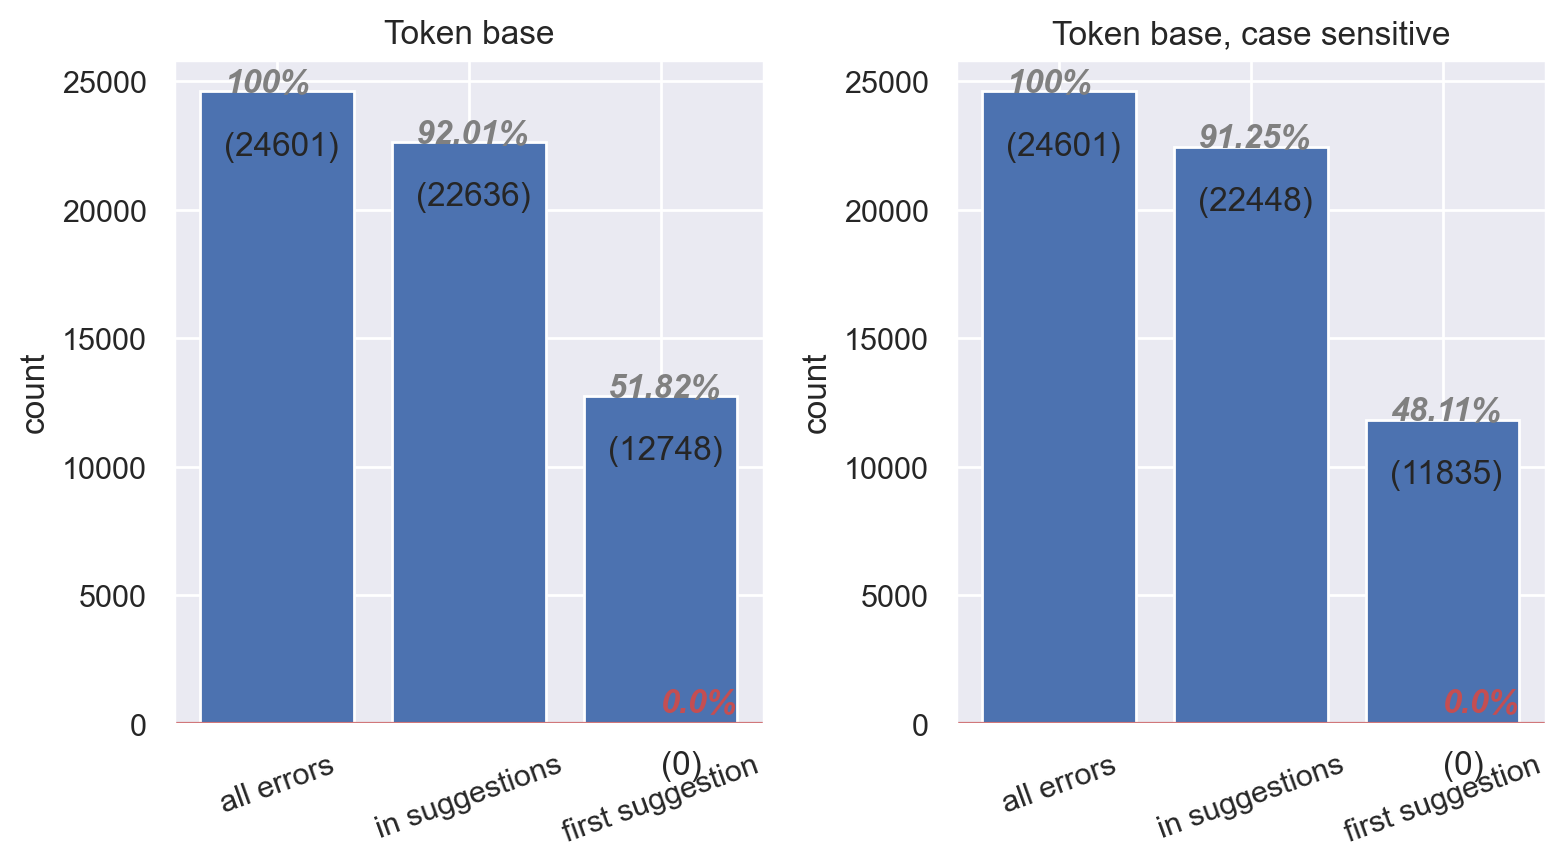

In [11]:
fig, axs = loop_plot(x_y_plots, ub_list)

# CONFIQ for each plot each

#axs[0].set_title("Type base")
axs[0].set_title("Token base")

#axs[2].set_title("Type base, case sensitive")
axs[1].set_title("Token base, case sensitive")

#plt.set_title("Spelling correction by Language Tool (TYPE base)", fontweight='bold')
plt.tight_layout()
plt.show()

### Ratios

In [12]:
display(values_token[2]/values_token[0]) # first_sugg/all_token
display(values_token[2]/values_token[1]) # first_sugg/in_sugg

0.5181903174667697

0.5631737056016964

<a id='3'></a><br>
## 3 - Distributions (token base)
- Per language_tool suggestions (indices)
- Per testpoint

In [14]:
# PREPARATION
# How often is it not in suggestions at all? dummy index -1
data_error_token['sugg_idx'].fillna(-1, inplace=True)
#data_error_types['sugg_idx'].fillna(-1, inplace=True)

In [15]:
display(data_error_token.sugg_idx.value_counts().sort_values(ascending=False))
#display(data_error_types.sugg_idx.value_counts().sort_values(ascending=False))

 0.0    12748
 1.0     3450
 2.0     2235
-1.0     1965
 3.0     1356
 5.0      965
 4.0      965
 6.0      372
 7.0      287
 8.0      200
 9.0       58
Name: sugg_idx, dtype: int64

<a id='5'></a><br>
#### 1) Per language_tool suggestions (indices)

In [16]:
#sns.countplot(data_error_types.dict_index)
#sns.countplot(data_error_types[data_error_types.possible].dict_index)

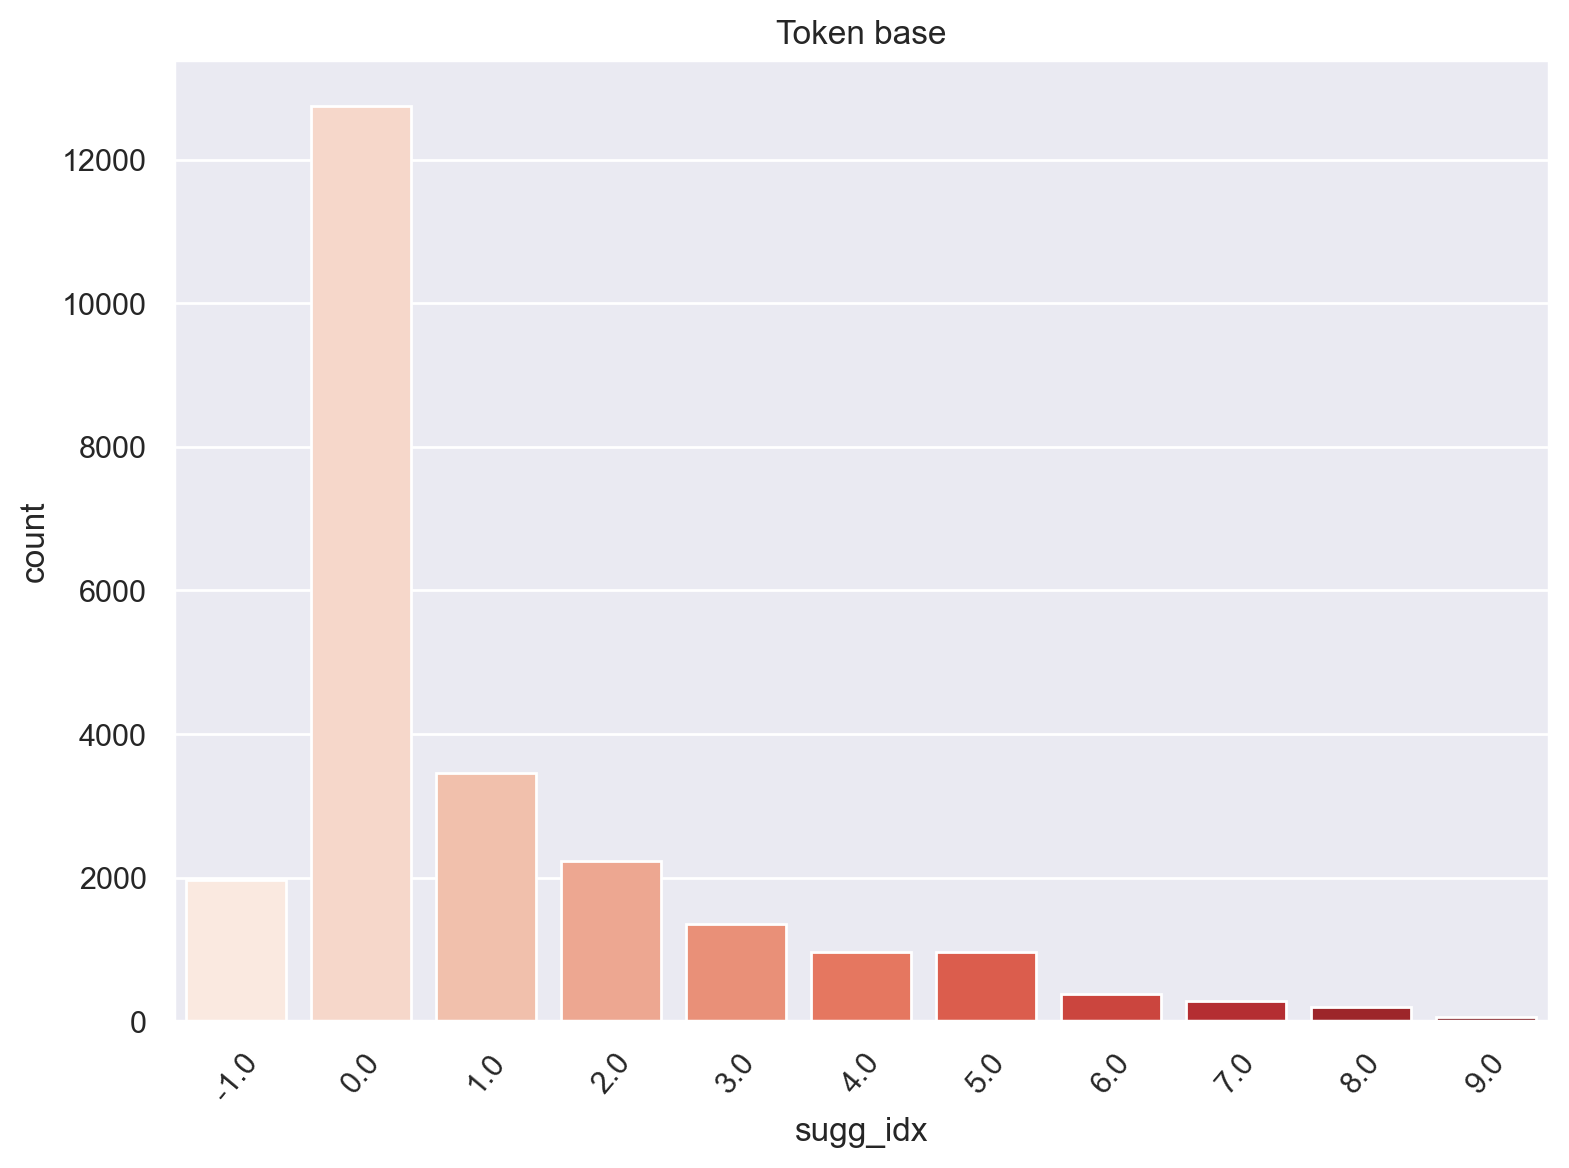

In [17]:
fig = plt.figure()
axs = fig.add_subplot(1,1,1)
#fig, axs = plt.subplots(1,1,1)
#ax1 = fig.add_subplot(1, 2, 1)
#ax2 = fig.add_subplot(1, 2, 2)

sns.countplot(x='sugg_idx', data=data_error_token, palette='Reds', ax=axs)
#sns.countplot(x='sugg_idx', data=data_error_types,  palette='Reds', ax=axs[1])

axs.set_title('Token base')
#axs[1].set_title('Type base')

# Labels are wrong this way; Gives back labels in the wrong order
#axs[0].set_xticklabels(labels=list(data_error_token.sugg_idx.unique()), rotation=50)
#axs[1].set_xticklabels(labels=list(data_error_types.sugg_idx.unique()), rotation=50)

axs.set_xticklabels(axs.get_xticklabels(), rotation=50)
#axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=50)

fig.tight_layout()

<a id='4'></a><br>
## 4 - Relationships

### Relationship: Suggestions index on testpoint
- Percent stacked bar plot
- Percent stacked bar plot, 3 categories


*Beforehand: <br>
Because there are so many indices of suggestions (0-14 and -1), values equal or above 5.0 are mapped to 5.0, so that there is a category ">= 5".*

In [18]:
data_error_token['testpoint'] = data_error_token.filename.apply(lambda x: x.split('-')[0])

In [20]:
# MAPPING
# Summarize values; 0, 1, 2, 3, 4, 5+
# Has to be mapped to one value, i. e. 5
        
def map_idx_5(x):
    sugg_idx = x['sugg_idx']
    if sugg_idx in [5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0]:
        return 5.0
    else:
        return sugg_idx
    
# Map categories and create new column for result
data_error_token['sugg_idx_5'] = data_error_token.apply(map_idx_5, axis=1)

#### 1) Percent stacked bar plot

In [21]:
# TODO: Modularize

# Get values: PERCENT STACKED BAR PLOT

# 1) Get counts for hue variable sugg_idx_5
def get_count_5(x, gb_var='testpoint'):
    return data_error_token[data_error_token.sugg_idx_5==x].groupby(gb_var).count().reset_index()

# 6
ct_non = get_count_5(-1)
ct_0 = get_count_5(0.0)
ct_1 = get_count_5(1.0)
ct_2 = get_count_5(2.0)
ct_3 = get_count_5(3.0)
ct_4 = get_count_5(4.0)
ct_5 = get_count_5(5.0)

In [22]:
# 2) Get totals, i. e. count for 100%
idx_5_total = [i+j+k+l+m+n+o for i,j,k,l,m,n,o in zip(ct_non['freq_ori'], ct_0['freq_ori'], ct_1['freq_ori'],
                                     ct_2['freq_ori'], ct_3['freq_ori'], ct_4['freq_ori'], ct_5['freq_ori'])] # list comprehension
display(idx_5_total)

[1716, 2154, 2028, 2520, 2527, 2924, 2900, 3046, 2549, 2237]

In [23]:
# 3) Get ratio of respective bars in percent, i. e. bar "length"
bars_ct_non = [i / j * 100 for i, j in zip(ct_non['freq_ori'], idx_5_total)]
bars_ct_0 = [i / j * 100 for i, j in zip(ct_0['freq_ori'], idx_5_total)]
bars_ct_1 = [i / j * 100 for i, j in zip(ct_1['freq_ori'], idx_5_total)]
bars_ct_2 = [i / j * 100 for i, j in zip(ct_2['freq_ori'], idx_5_total)]
bars_ct_3 = [i / j * 100 for i, j in zip(ct_3['freq_ori'], idx_5_total)]
bars_ct_4 = [i / j * 100 for i, j in zip(ct_4['freq_ori'], idx_5_total)]
bars_ct_5 = [i / j * 100 for i, j in zip(ct_5['freq_ori'], idx_5_total)]

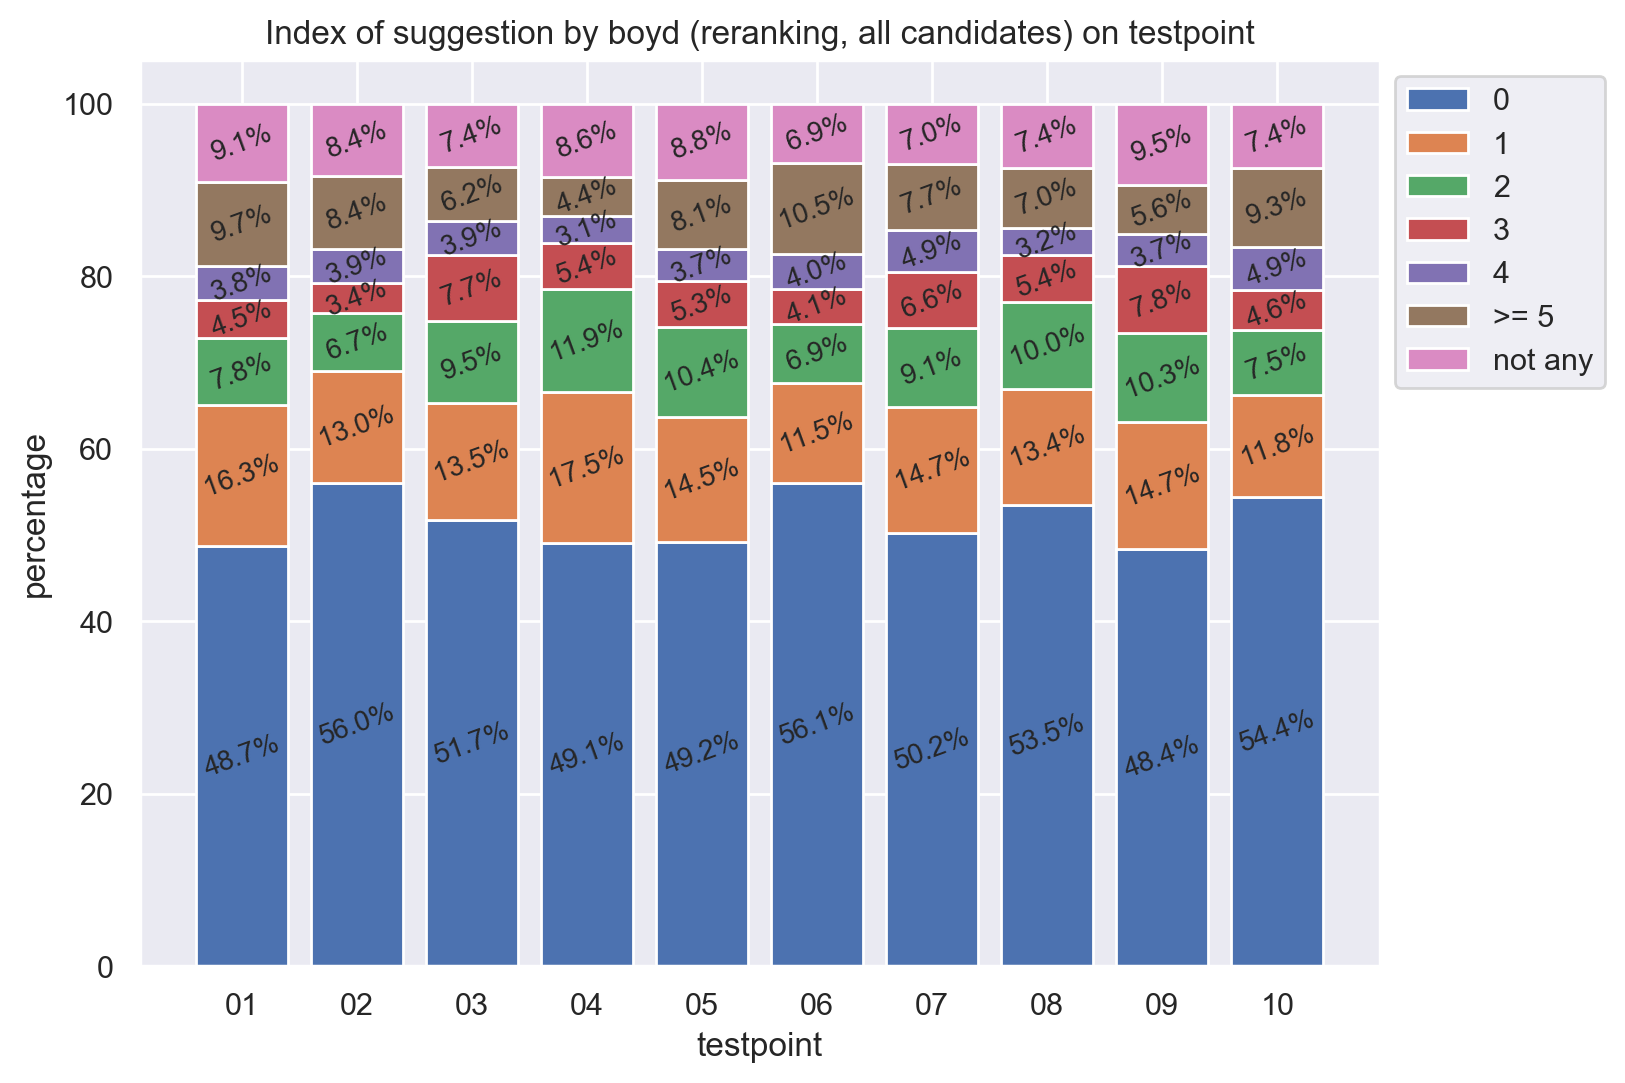

In [24]:
# TODO: Code schöner machen?!
# TODO: Percentages plotten...?
# PERCENT STACKED BAR PLOT

x_pos = np.arange(0,10) # position of x-ticks
x_lab = ct_non['testpoint']

fig = plt.figure()
axs = fig.add_subplot(1,1,1)
# Create bars
axs.bar(x_pos, bars_ct_0, bottom = 0, label='0') # index 0
axs.bar(x_pos, bars_ct_1, bottom=bars_ct_0, label='1') # index 1
axs.bar(x_pos, bars_ct_2, bottom=[i+j for i, j in zip(bars_ct_0,bars_ct_1)], label='2') 
axs.bar(x_pos, bars_ct_3, bottom=[i+j+k for i, j, k in zip(bars_ct_0,bars_ct_1, bars_ct_2)], label='3') 
axs.bar(x_pos, bars_ct_4, bottom=[i+j+k+l for i, j, k, l in zip(bars_ct_0,bars_ct_1, bars_ct_2, bars_ct_3)], label='4')
axs.bar(x_pos, bars_ct_5, bottom=[i+j+k+l+m for i, j, k, l, m in zip(bars_ct_0,bars_ct_1, bars_ct_2, bars_ct_3, bars_ct_4)], label='>= 5')
axs.bar(x_pos, bars_ct_non, bottom=[i+j+k+l+m+n for i, j, k, l, m, n in zip(bars_ct_0,bars_ct_1, bars_ct_2, bars_ct_3, bars_ct_4, bars_ct_5)], label='not any')

# Costum x-axis
axs.set_xticks(x_pos)
axs.set_xticklabels(x_lab)
axs.set_xlabel('testpoint')

axs.set_ylabel('percentage')

# Plot percentages
for idx, (ct_ttl, pct_non, pct_0, pct_1, pct_2, pct_3, pct_4, pct_5) in enumerate(zip(idx_5_total, bars_ct_non, bars_ct_0, bars_ct_1, bars_ct_2, bars_ct_3, bars_ct_4, bars_ct_5)):
    axs.text(idx, bars_ct_0[idx]/2, str(round(pct_0,1))+'%', va='center', ha='center', rotation=20, fontsize=10)
    axs.text(idx, bars_ct_0[idx]+(bars_ct_1[idx]/2), str(round(pct_1,1))+'%', va='center', ha='center', rotation=20, fontsize=10)
    axs.text(idx, bars_ct_0[idx]+bars_ct_1[idx]+(bars_ct_2[idx]/2), str(round(pct_2,1))+'%', va='center', ha='center', rotation=20, fontsize=10)
    axs.text(idx, bars_ct_0[idx]+bars_ct_1[idx]+bars_ct_2[idx]+(bars_ct_3[idx]/2), str(round(pct_3,1))+'%', va='center', ha='center', rotation=20, fontsize=10)
    axs.text(idx, bars_ct_0[idx]+bars_ct_1[idx]+bars_ct_2[idx]+bars_ct_3[idx]+(bars_ct_4[idx]/2), str(round(pct_4,1))+'%', va='center', ha='center', rotation=20, fontsize=10)
    axs.text(idx, bars_ct_0[idx]+bars_ct_1[idx]+bars_ct_2[idx]+bars_ct_3[idx]+bars_ct_4[idx]+(bars_ct_5[idx]/2), str(round(pct_5,1))+'%', va='center', ha='center', rotation=20, fontsize=10)
    axs.text(idx, bars_ct_0[idx]+bars_ct_1[idx]+bars_ct_2[idx]+bars_ct_3[idx]+bars_ct_4[idx]+bars_ct_5[idx]+(bars_ct_non[idx]/2), str(round(pct_non,1))+'%', va='center', ha='center', rotation=20, fontsize=10)

# Add a legend
axs.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

# Plot title
axs.set_title('Index of suggestion by boyd (reranking, all candidates) on testpoint')

plt.show()

<a id='6'></a><br>
#### 2) Percent stacked bar plot, 3 categories

In [25]:
# Per testpoint, count of error at index 0 in contrast to all other errors
# alle anderen
# sugg_idx nicht gefunden?! -1
def map_idx_bin(x):
    sugg_idx = x['sugg_idx']
    if sugg_idx == 0.0:
        return 0.0
    elif sugg_idx in np.arange(1.0,15.0):
        return 1.0
    else:
        return sugg_idx

In [26]:
# Map categories
data_error_token['sugg_idx_three'] = data_error_token.apply(map_idx_bin, axis=1)
#data_error_types['sugg_idx_three'] = data_error_types.apply(map_idx_bin, axis=1)

In [27]:
# TODO: Modularize
# Count of error tokens, i. e. freq_ori, for each category (-1; 0; 1)
suggs_non = data_error_token[data_error_token.sugg_idx_three==-1].groupby('testpoint').count().reset_index() # returns index, not testpoint as index
#display(suggs_non)
suggs_0 = data_error_token[data_error_token.sugg_idx_three==0].groupby('testpoint').count().reset_index()
#display(suggs_0)
suggs_1 = data_error_token[data_error_token.sugg_idx_three==1].groupby('testpoint').count().reset_index()
#display(suggs_1)

In [28]:
# Get total, i. e. count for 100%
suggs_total = [i+j+k for i,j,k in zip(suggs_non['freq_ori'], suggs_0['freq_ori'], suggs_1['freq_ori'])] # list comprehension
#display(suggs_total)

# Get ratio of respective bars in percent, i. e. bar "length"
bars_sugg_non = [i / j * 100 for i, j in zip(suggs_non['freq_ori'], suggs_total)]
bars_sugg_0 = [i / j * 100 for i, j in zip(suggs_0['freq_ori'], suggs_total)]
bars_sugg_1 = [i / j * 100 for i, j in zip(suggs_1['freq_ori'], suggs_total)]
#display(bars_sugg_non, bars_sugg_0, bars_sugg_1)

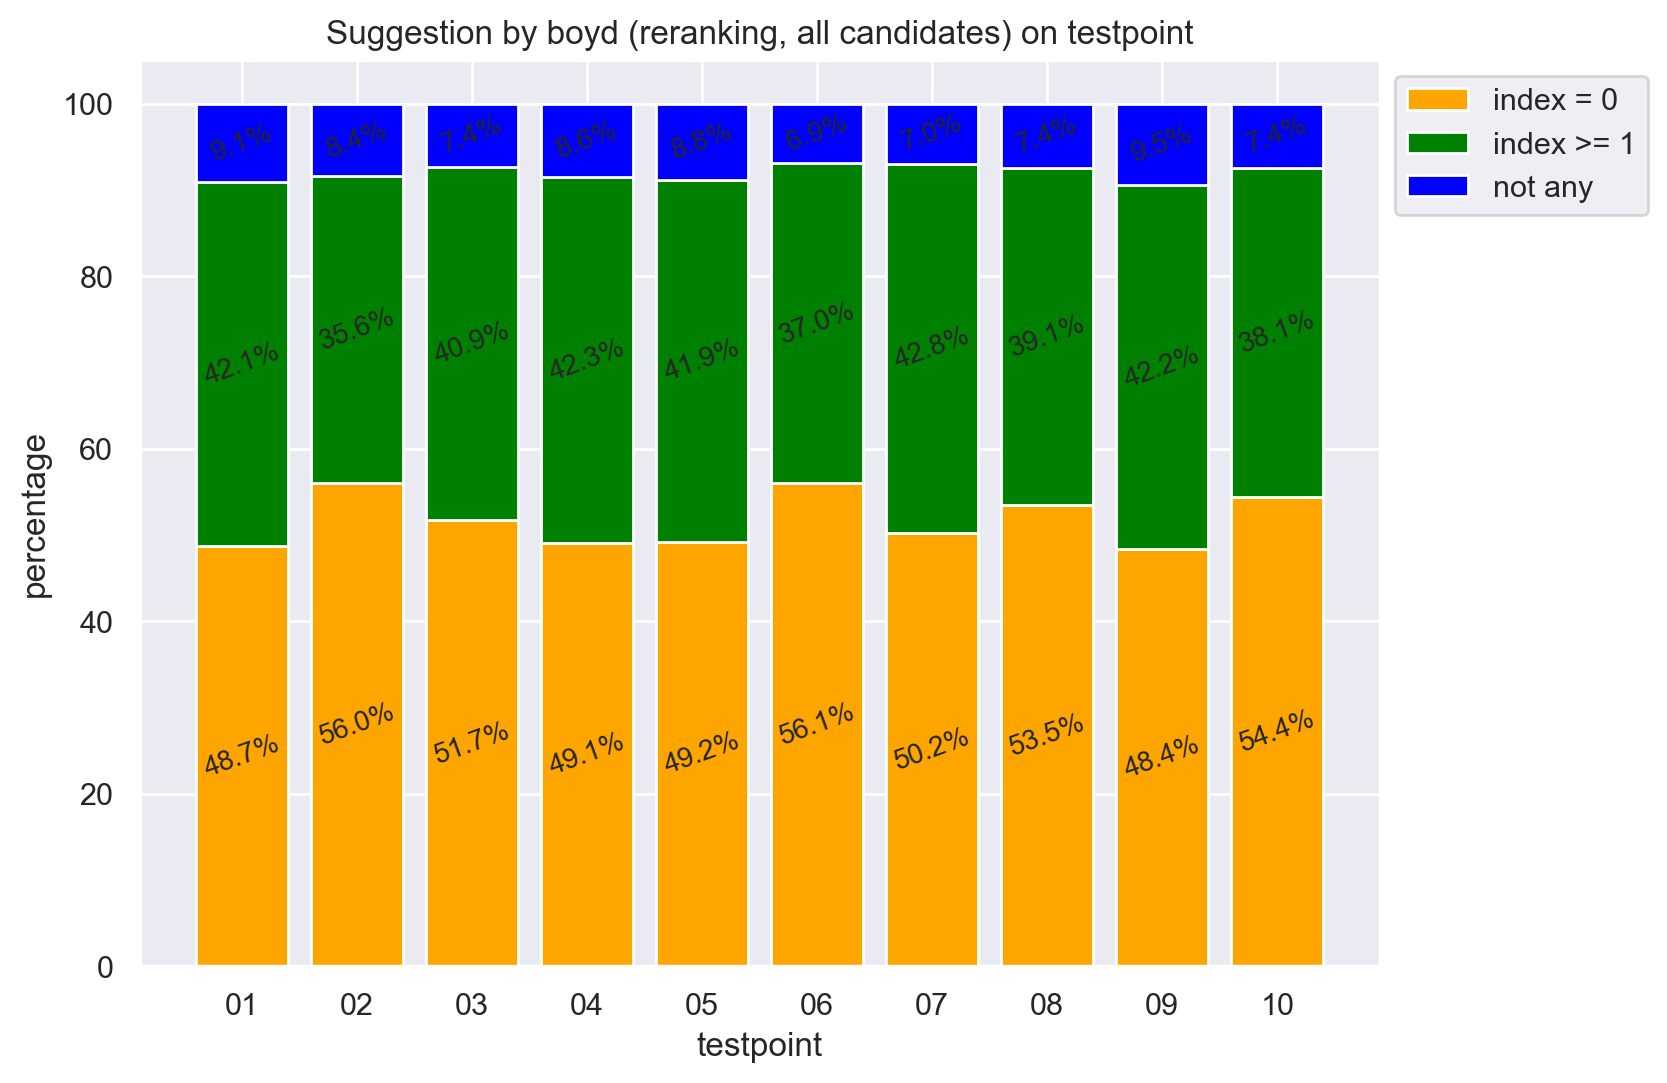

In [29]:
# PERCENT STACKED BAR PLOT

x_pos = np.arange(0,10) # position of x-ticks
x_lab = suggs_non['testpoint']

fig = plt.figure()
axs = fig.add_subplot(1,1,1)
# Create bars
axs.bar(x_pos, bars_sugg_0, bottom = 0, color='orange', label='index = 0') # index 0
axs.bar(x_pos, bars_sugg_1, bottom=bars_sugg_0, color='green', label='index >= 1') # index 1
axs.bar(x_pos, bars_sugg_non, bottom=[i+j for i, j in zip(bars_sugg_0,bars_sugg_1)], color='blue', label='not any') # noty any

# Costum x-axis
axs.set_xticks(x_pos)
axs.set_xticklabels(x_lab)
axs.set_xlabel('testpoint')

axs.set_ylabel('percentage')

# Plot percentages
for idx, (ct_ttl, pct_non, pct_0, pct_1) in enumerate(zip(suggs_total, bars_sugg_non, bars_sugg_0, bars_sugg_1)):
    axs.text(idx, bars_sugg_0[idx]/2, str(round(pct_0,1))+'%', va='center', ha='center', rotation=20, fontsize=10)
    axs.text(idx, bars_sugg_0[idx]+(bars_sugg_1[idx]/2), str(round(pct_1,1))+'%', va='center', ha='center', rotation=20, fontsize=10)
    axs.text(idx, bars_sugg_0[idx]+bars_sugg_1[idx]+(bars_sugg_non[idx]/2), str(round(pct_non,1))+'%', va='center', ha='center', rotation=20, fontsize=10)

# Add a legend
axs.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

# Plot title
axs.set_title('Suggestion by boyd (reranking, all candidates) on testpoint')

plt.show()

In [30]:
# Get averages for testpoints 1-5 and 6-10
# Shares ordered by appereance in plot
shares = [bars_sugg_0, bars_sugg_1, bars_sugg_non]
helpers.print_AM_half_tp(shares)

50.95
52.52
********************
40.58
39.84
********************
8.47
7.64
********************


<a id='7'></a><br>
### Relationship: Suggestions index on Levenshtein distance
- Percent stacked bar plot

#### - Percent stacked bar plot

In [31]:
from nltk.metrics.distance import edit_distance

#data_error_types['edit_dst'] = data_error_types.apply(lambda r: edit_distance(r.original, r.corrected), axis=1)
data_error_token['edit_dst'] = data_error_token.apply(lambda r: edit_distance(r.original, r.corrected), axis=1)

In [32]:
# Map them to edit distance 1 for plotting of Levenshtein distance stats
data_error_token['edit_dst_0excl'] = data_error_token.edit_dst.apply(lambda x: 1 if x == 0 else x)
#data_error_types['edit_dst_0excl'] = data_error_types.edit_dst.apply(lambda x: 1 if x == 0 else x)
#display(data_error_token[data_error_token['edit_dst_0excl']==0])
#display(data_error_types[data_error_types['edit_dst_0excl']==0])

In [33]:
# Map values above 4 to 4 to summarize categories with few counts
data_error_token['edit_dst_4'] = data_error_token.edit_dst_0excl.apply(lambda x: 4 if x in [5,6,7,8,9] else x)
#data_error_types['edit_dst_4'] = data_error_types.edit_dst_0excl.apply(lambda x: 4 if x in [5,6,7,8,9] else x)
#data_error_token.head(10)

In [34]:
def get_count_zero(x, gb_var='edit_dst_4'):
    grouped = data_error_token[data_error_token.sugg_idx_5==x].groupby(gb_var).count()
    # From edit-distance 2 on, there are zero values for the categories (index of suggestions) that are not counted by count
    # Therefore zero counts have to be added manually
    added_zero_values = grouped.reindex(data_error_token.edit_dst_4.unique()).fillna(0).astype(int)
    return added_zero_values.reset_index()

In [35]:
# TODO: Modularize
# 1) Get counts for each category (-1; 0; 1; 2; 3; 4; 5)
# Function see above
ct_non = get_count_zero(-1, gb_var='edit_dst_4')
ct_0 = get_count_zero(0.0, gb_var='edit_dst_4')
ct_1 = get_count_zero(1.0, gb_var='edit_dst_4')
ct_2 = get_count_zero(2.0, gb_var='edit_dst_4')
ct_3 = get_count_zero(3.0, gb_var='edit_dst_4')
ct_4 = get_count_zero(4.0, gb_var='edit_dst_4')
ct_5 = get_count_zero(5.0, gb_var='edit_dst_4')
#display(ct_non)

In [36]:
# 2) Get total, i. e. count for 100%
ct_total_2 = [i+j+k+l+m+n+o for i,j,k,l,m,n,o in zip(ct_non['sugg_idx_5'], ct_0['sugg_idx_5'], ct_1['sugg_idx_5'],
                                                   ct_2['sugg_idx_5'], ct_3['sugg_idx_5'], ct_4['sugg_idx_5'], ct_5['sugg_idx_5'])]
#display(ct_total_2)

In [37]:
# 3) Get ratio of respective bars in percent, i. e. bar "length"
bars_ct_non = [i / j * 100 for i, j in zip(ct_non['sugg_idx_5'], ct_total_2)]
bars_ct_0 = [i / j * 100 for i, j in zip(ct_0['sugg_idx_5'], ct_total_2)]
bars_ct_1 = [i / j * 100 for i, j in zip(ct_1['sugg_idx_5'], ct_total_2)]
bars_ct_2 = [i / j * 100 for i, j in zip(ct_2['sugg_idx_5'], ct_total_2)]
bars_ct_3 = [i / j * 100 for i, j in zip(ct_3['sugg_idx_5'], ct_total_2)]
bars_ct_4 = [i / j * 100 for i, j in zip(ct_4['sugg_idx_5'], ct_total_2)]
bars_ct_5 = [i / j * 100 for i, j in zip(ct_5['sugg_idx_5'], ct_total_2)]
#display(bars_ct_non)

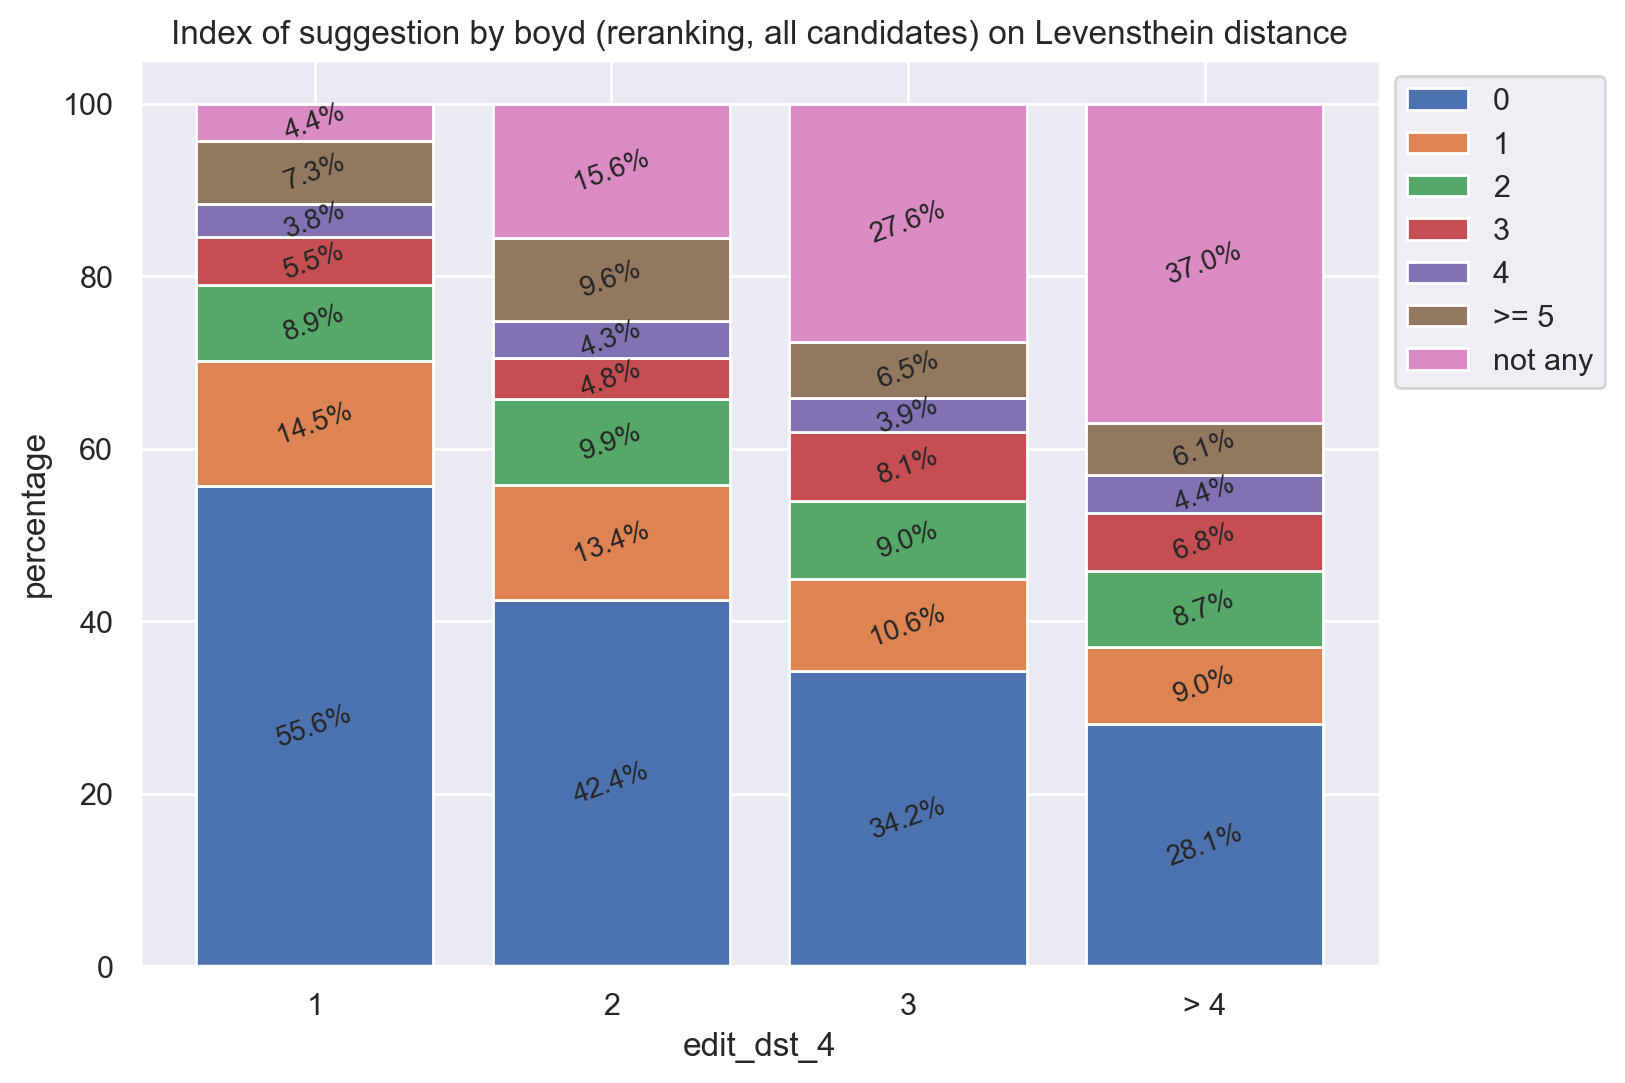

In [38]:
# PERCENT STACKED BAR PLOT

x_pos = np.arange(0,4) # position of x-ticks
#x_lab = ct_non['edit_dst_4']

fig = plt.figure()
axs = fig.add_subplot(1,1,1)

# Create bars
axs.bar(x_pos, bars_ct_0, bottom = 0, label='0') # index 0
axs.bar(x_pos, bars_ct_1, bottom=bars_ct_0, label='1') # index 1
axs.bar(x_pos, bars_ct_2, bottom=[i+j for i, j in zip(bars_ct_0,bars_ct_1)], label='2') 
axs.bar(x_pos, bars_ct_3, bottom=[i+j+k for i, j, k in zip(bars_ct_0,bars_ct_1, bars_ct_2)], label='3') 
axs.bar(x_pos, bars_ct_4, bottom=[i+j+k+l for i, j, k, l in zip(bars_ct_0,bars_ct_1, bars_ct_2, bars_ct_3)], label='4')
axs.bar(x_pos, bars_ct_5, bottom=[i+j+k+l+m for i, j, k, l, m in zip(bars_ct_0,bars_ct_1, bars_ct_2, bars_ct_3, bars_ct_4)], label='>= 5')
axs.bar(x_pos, bars_ct_non, bottom=[i+j+k+l+m+n for i, j, k, l, m, n in zip(bars_ct_0,bars_ct_1, bars_ct_2, bars_ct_3, bars_ct_4, bars_ct_5)], label='not any')

# Costum x-axis
axs.set_xticks(x_pos)
axs.set_xticklabels(['1','2','3','> 4'])
axs.set_xlabel('edit_dst_4')

axs.set_ylabel('percentage')

# Plot percentages
for idx, (ct_ttl, pct_non, pct_0, pct_1, pct_2, pct_3, pct_4, pct_5) in enumerate(zip(ct_total_2, bars_ct_non, bars_ct_0, bars_ct_1, bars_ct_2, bars_ct_3, bars_ct_4, bars_ct_5)):
    axs.text(idx, bars_ct_0[idx]/2, str(round(pct_0,1))+'%', va='center', ha='center', rotation=20, fontsize=10)
    axs.text(idx, bars_ct_0[idx]+(bars_ct_1[idx]/2), str(round(pct_1,1))+'%', va='center', ha='center', rotation=20, fontsize=10)
    axs.text(idx, bars_ct_0[idx]+bars_ct_1[idx]+(bars_ct_2[idx]/2), str(round(pct_2,1))+'%', va='center', ha='center', rotation=20, fontsize=10)
    axs.text(idx, bars_ct_0[idx]+bars_ct_1[idx]+bars_ct_2[idx]+(bars_ct_3[idx]/2), str(round(pct_3,1))+'%', va='center', ha='center', rotation=20, fontsize=10)
    axs.text(idx, bars_ct_0[idx]+bars_ct_1[idx]+bars_ct_2[idx]+bars_ct_3[idx]+(bars_ct_4[idx]/2), str(round(pct_4,1))+'%', va='center', ha='center', rotation=20, fontsize=10)
    axs.text(idx, bars_ct_0[idx]+bars_ct_1[idx]+bars_ct_2[idx]+bars_ct_3[idx]+bars_ct_4[idx]+(bars_ct_5[idx]/2), str(round(pct_5,1))+'%', va='center', ha='center', rotation=20, fontsize=10)
    axs.text(idx, bars_ct_0[idx]+bars_ct_1[idx]+bars_ct_2[idx]+bars_ct_3[idx]+bars_ct_4[idx]+bars_ct_5[idx]+(bars_ct_non[idx]/2), str(round(pct_non,1))+'%', va='center', ha='center', rotation=20, fontsize=10)
    
# Add a legend
axs.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

# Plot title
axs.set_title('Index of suggestion by boyd (reranking, all candidates) on Levensthein distance')

plt.show()